In [1]:
import pandas as pd
import numpy as np
import os
import ast # For parsing strings as tuples
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic_path = "raw_data\\log\\"
list_file = os.listdir(traffic_path)
list_file

['logt21.txt',
 'logt22.txt',
 'logt23.txt',
 'logt24.txt',
 'logt25.txt',
 'logt31.txt',
 'logt32.txt']

In [3]:
records =[]
df = pd.DataFrame()
for i in list_file:
    with open(traffic_path + i) as file:
        data = file.readlines()
        print('Processed file {}'.format(i))
    for line in data:
        parse_tuple = ast.literal_eval(line)
        records.append(parse_tuple)
    df_1 = pd.DataFrame(records)
    df = pd.concat([df, df_1])

Processed file logt21.txt
Processed file logt22.txt
Processed file logt23.txt
Processed file logt24.txt
Processed file logt25.txt
Processed file logt31.txt
Processed file logt32.txt


In [4]:
print(df.columns)
print(df.shape)

Index(['ItemId', 'RealTimePlaying', 'Firmware', 'DefaultGetway', 'SubMenuId',
       'Folder', 'ItemName', 'AppName', 'ElapsedTimePlaying', 'Screen',
       'SecondaryDNS', 'LogId', 'Mac', 'LocalType', 'SubnetMask', 'ip_wan',
       'CustomerID', 'Url', 'ListOnFolder', 'Contract', 'Directors',
       'SessionMainMenu', 'PrimaryDNS', 'ChapterID', 'Ip', 'BoxTime',
       'PublishCountry', 'Session', 'SessionSubMenu', 'AppId', 'Duration',
       'Event', 'DateStamp', 'isLandingPage', 'Key', 'Multicast', 'Title',
       'IsPersonal', 'IDRelated', 'keyword', 'Original', 'Hit', 'Path'],
      dtype='object')
(2806916, 43)


In [5]:
log = df[['Mac', 'SessionMainMenu', 'AppName', 'LogId', 'Event', 'ItemId', 'RealTimePlaying']]
log.rename(columns= {'Mac':'MAC'}, inplace=True)
log.columns

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21832\6137785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log.rename(columns= {'Mac':'MAC'}, inplace=True)


Index(['MAC', 'SessionMainMenu', 'AppName', 'LogId', 'Event', 'ItemId',
       'RealTimePlaying'],
      dtype='object')

In [6]:
log.head(5)

,MAC,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying
0,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,570.3
1,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:01:56:838,IPTV,40,EnterIPTV,NaN,NaN
2,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:02:29:258,VOD,55,NextVOD,100052388,NaN
3,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,18,ChangeModule,NaN,NaN
4,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,54,PlayVOD,100052388,NaN


In [7]:
user_info = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Practice Test 2025\\03. Python\\FPT_Test\\DataSampleTest\\user_info.txt", delimiter= "\t")
user_info['MAC'] = user_info["MAC"].str[4:]
user_info.rename(columns= {'# of days' : 'NumOfDays'}, inplace = True)
user_info.head(5)

,MAC,NumOfDays
0,B046FCB79E0B,20
1,B046FCB3528B,181
2,B046FCAAFB73,426
3,B046FCAAFB72,426
4,B046FCAA2085,429


In [8]:
print("Missing value in log data: ")
print(log.isnull().sum())
print("Missing value in user info data: ")
print(user_info.isnull().sum())

Missing value in log data: 
MAC                      0
SessionMainMenu         82
AppName                  0
LogId                    0
Event                    0
ItemId              463139
RealTimePlaying    1890296
dtype: int64
Missing value in user info data: 
MAC          0
NumOfDays    0
dtype: int64


In [9]:
data = log.merge(user_info, on='MAC', how='outer')
data.dropna(subset=['SessionMainMenu'], inplace=True)
data['ItemId'] = data['ItemId'].fillna('Unknow')
data['RealTimePlaying'] = data['RealTimePlaying'].fillna(0)
data['RealTimePlaying'] = data['RealTimePlaying'].astype(float)
data['TimePlayingHour'] = data['RealTimePlaying']/360
data['SessionDate'] = pd.to_datetime(data['SessionMainMenu'].str[13:23], format='%Y:%m:%d')

data.isnull().sum()

MAC                   0
SessionMainMenu       0
AppName               0
LogId                 0
Event                 0
ItemId                0
RealTimePlaying    6136
NumOfDays             0
TimePlayingHour    6136
SessionDate           0
dtype: int64

In [10]:
data.head()

,MAC,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying,NumOfDays,TimePlayingHour,SessionDate
165,B046FCA69EA6,B046FCA69EA6:2016:02:05:17:54:13:946,IPTV,41,StartChannel,149,0.000,629,0.000000,2016-02-05
166,B046FCA69EA6,B046FCA69EA6:2016:02:05:17:54:13:946,IPTV,42,StopChannel,147,5069.461,629,14.081836,2016-02-05
167,B046FCA69EA6,B046FCA69EA6:2016:02:05:17:54:13:946,IPTV,41,StartChannel,148,0.000,629,0.000000,2016-02-05
168,B046FCA69EA6,B046FCA69EA6:2016:02:10:22:46:00:150,IPTV,41,StartChannel,3,0.000,629,0.000000,2016-02-10
169,B046FCA69EA6,B046FCA69EA6:2016:02:10:22:46:00:150,IPTV,42,StopChannel,181,7.631,629,0.021197,2016-02-10


In [11]:
data['SessionDate'].max()

Timestamp('2017-02-03 00:00:00')

### **📈 Gợi ý trực quan hóa**
* Bar chart: top 10 user có thời lượng xem cao nhất
* Boxplot: so sánh thời gian xem giữa app IPTV và VOD
* Scatterplot: giữa # of days và total_watch_time → tìm mối quan hệ

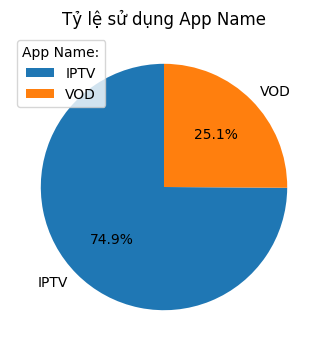

In [12]:
app_dist = data['AppName'].value_counts(normalize=True).to_frame().reset_index()
app_dist.columns = ['AppName', 'Proportion']

plt.figure(figsize=(4,4))
plt.pie(app_dist['Proportion'], labels= app_dist['AppName'], autopct='%1.1f%%',startangle = 90)
plt.legend(title="App Name:")
plt.title('Tỷ lệ sử dụng App Name')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21832\4245424424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[0], data = data, x="AppName", palette = 'Blues', order=order)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21832\4245424424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x=time_playing_dist['AppName'], y=time_playing_dist['TimePlayingHour'], palette = 'Blues', order=order)


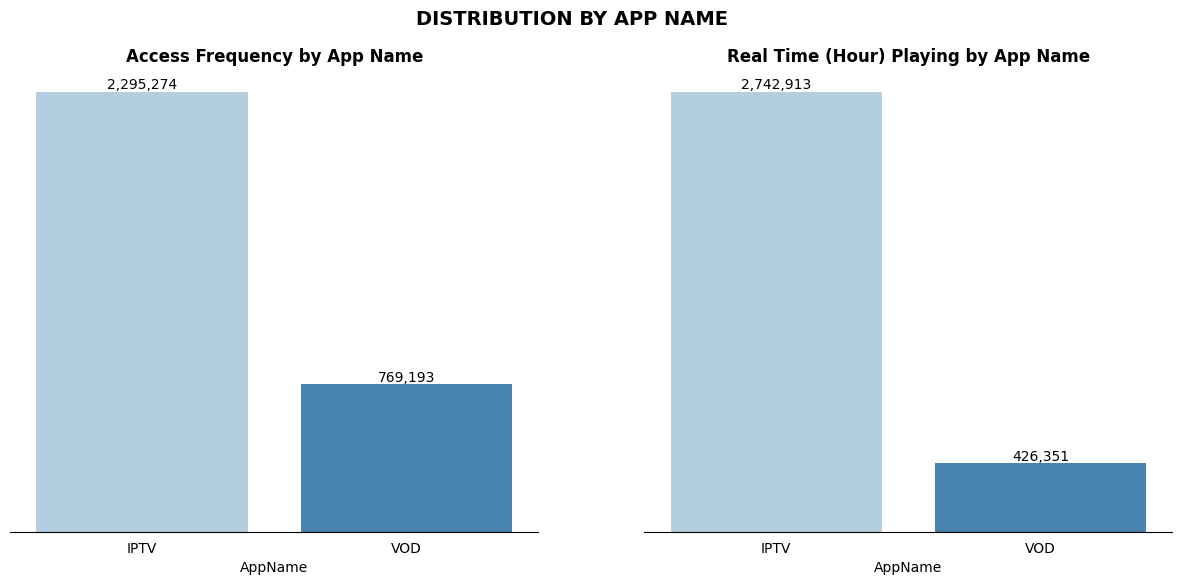

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
order = sorted(data['AppName'].unique())

# Plot Access Frequency:
sns.countplot(ax=axs[0], data = data, x="AppName", palette = 'Blues', order=order)
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='{:,.0f}'.format)
axs[0].get_yaxis().set_visible(False) #remove value y column
spines = ['top', 'right','left']
for s in spines:
    axs[0].spines[s].set_visible(False)
axs[0].tick_params(left = False, bottom = False)
axs[0].set_title("Access Frequency by App Name", fontweight = 'bold', size = 12)

# Plot Hour Playing by App Name
time_playing_dist = data.groupby('AppName')['TimePlayingHour'].sum().to_frame().reset_index()

sns.barplot(ax=axs[1], x=time_playing_dist['AppName'], y=time_playing_dist['TimePlayingHour'], palette = 'Blues', order=order)
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='{:,.0f}'.format)
axs[1].get_yaxis().set_visible(False) #remove value y column
spines = ['top', 'right','left']
for s in spines:
    axs[1].spines[s].set_visible(False)
axs[1].tick_params(left = False, bottom = False)
axs[1].set_title("Real Time (Hour) Playing by App Name", fontweight = 'bold', size = 12)

plt.suptitle("DISTRIBUTION BY APP NAME", fontweight = 'bold', size = 14)
plt.show()

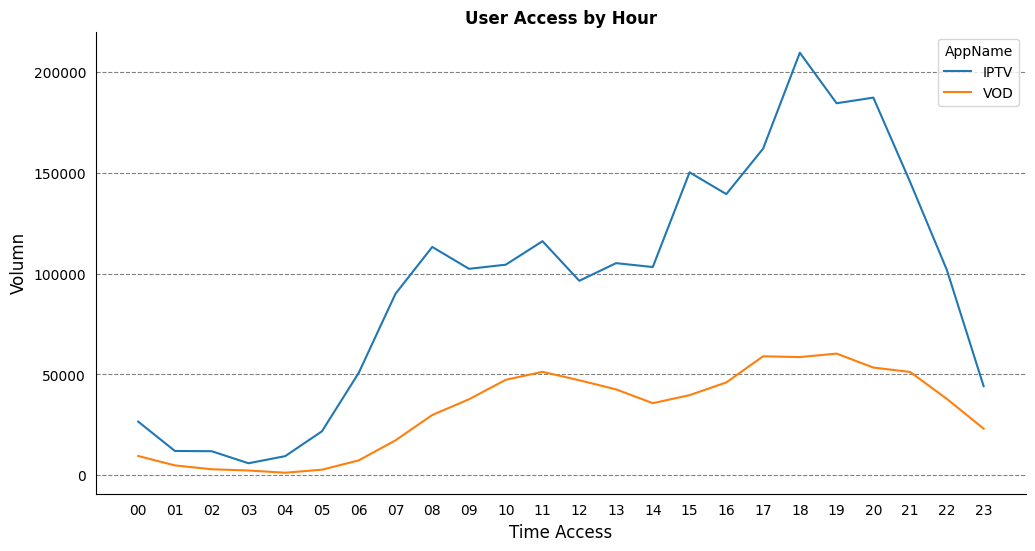

In [14]:
time_access = data[['SessionMainMenu','AppName', 'MAC']].copy()
time_access['Hour'] = data['SessionMainMenu'].str[24:26]
time_access = time_access.groupby(['Hour', 'AppName'])['MAC'].count().reset_index().sort_values(by='Hour', ascending=True)
time_access = time_access[time_access['Hour'] != ""]

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = time_access, x='Hour', y='MAC', hue='AppName')
ax.yaxis.grid(color = 'gray', linestyle = 'dashed')
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)
ax.tick_params(left = False, bottom = False)
plt.xlabel('Time Access',size = 12)
plt.ylabel('Volumn',size = 12)
plt.title('User Access by Hour', fontweight = 'bold', size = 12)
plt.show()

### **A. Tần suất & mức độ sử dụng theo thời gian**
* Tổng số lần sử dụng (số dòng log) theo từng user
* Tổng thời gian xem (RealTimePlaying) theo user
* Trung bình thời gian xem mỗi session
#### 💡 Insight gợi ý:
* Người dùng mới (<30 ngày) có xu hướng xem ngắn hơn, ít session hơn?
* Người dùng lâu năm có thời gian xem trung bình mỗi lần cao hơn?

In [15]:
usage_summary = data.groupby('MAC').agg(
    NumOfSession = ('LogId', 'nunique'),
    NumOfAppPerMac = ('AppName', 'nunique'),
    TotalPlayingTimeHour = ('TimePlayingHour', 'sum'),
    AverageViewingTime = ('TimePlayingHour', 'mean'),
    DaysRegistered = ('NumOfDays', 'first'),
    LastActiveDate = ('SessionDate', 'max')
).reset_index()
usage_summary['InactiveDays'] = (usage_summary['LastActiveDate'].max() + pd.Timedelta(days=1) - usage_summary['LastActiveDate']).dt.days.astype(int)
usage_summary['WatchFrequency'] = usage_summary.apply(lambda x: round(x['TotalPlayingTimeHour']/x['DaysRegistered'],2) if x['DaysRegistered'] > 0 else 0, axis = 1)
usage_summary['UserType'] = usage_summary['DaysRegistered'].apply(lambda x: 'New user' if x<30 else 'Existing User')
usage_summary['AverageViewingTime'] = usage_summary['AverageViewingTime'].fillna(0)
usage_summary.head()

,MAC,NumOfSession,NumOfAppPerMac,TotalPlayingTimeHour,AverageViewingTime,DaysRegistered,LastActiveDate,InactiveDays,WatchFrequency,UserType
0,B046FCA69EA6,6,1,228.326103,1.130327,629,2016-02-22,348,0.36,Existing User
1,B046FCA6A074,9,2,2798.466000,1.361122,499,2016-02-23,347,5.61,Existing User
2,B046FCA6A27E,17,2,2404.105319,0.887124,406,2016-02-23,347,5.92,Existing User
3,B046FCA6A450,21,2,554.917361,0.468680,214,2016-02-20,350,2.59,Existing User
4,B046FCA6A47D,12,2,1048.580789,2.166489,532,2016-02-20,350,1.97,Existing User


In [16]:
usage_app = data.groupby(['MAC'])['AppName'].value_counts().reset_index(name='SessionPerApp')
# usage_app = usage_app.rename('SessionPerApp').reset_index()
usage_app = usage_app.pivot(index='MAC',columns='AppName',values='SessionPerApp')
usage_app = usage_app.rename(columns={'IPTV':'IPTV_use', 'VOD':'VOD_use'}).fillna(0).reset_index()
usage_app.head()

AppName,MAC,IPTV_use,VOD_use
0,B046FCA69EA6,202.0,0.0
1,B046FCA6A074,2044.0,12.0
2,B046FCA6A27E,1440.0,1280.0
3,B046FCA6A450,770.0,414.0
4,B046FCA6A47D,80.0,404.0


In [17]:
usage_time = data.groupby(['MAC', 'AppName'])['TimePlayingHour'].sum().reset_index(name='TimePlaying')
usage_time['TimePlaying'] = round(usage_time['TimePlaying'],2)
usage_time = usage_time.pivot(index='MAC',columns='AppName',values='TimePlaying')
usage_time = usage_time.rename(columns={'IPTV':'IPTV_time', 'VOD':'VOD_time'}).fillna(0).reset_index()
usage_time.head()

AppName,MAC,IPTV_time,VOD_time
0,B046FCA69EA6,228.33,0.00
1,B046FCA6A074,2798.47,0.00
2,B046FCA6A27E,1357.08,1047.02
3,B046FCA6A450,360.51,194.41
4,B046FCA6A47D,950.55,98.03


In [18]:
usage_summary = pd.merge(usage_summary, usage_app, on='MAC', how='outer')
usage_summary = pd.merge(usage_summary, usage_time, on='MAC', how='outer')
usage_summary.head()

,MAC,NumOfSession,NumOfAppPerMac,TotalPlayingTimeHour,AverageViewingTime,DaysRegistered,LastActiveDate,InactiveDays,WatchFrequency,UserType,IPTV_use,VOD_use,IPTV_time,VOD_time
0,B046FCA69EA6,6,1,228.326103,1.130327,629,2016-02-22,348,0.36,Existing User,202.0,0.0,228.33,0.00
1,B046FCA6A074,9,2,2798.466000,1.361122,499,2016-02-23,347,5.61,Existing User,2044.0,12.0,2798.47,0.00
2,B046FCA6A27E,17,2,2404.105319,0.887124,406,2016-02-23,347,5.92,Existing User,1440.0,1280.0,1357.08,1047.02
3,B046FCA6A450,21,2,554.917361,0.468680,214,2016-02-20,350,2.59,Existing User,770.0,414.0,360.51,194.41
4,B046FCA6A47D,12,2,1048.580789,2.166489,532,2016-02-20,350,1.97,Existing User,80.0,404.0,950.55,98.03


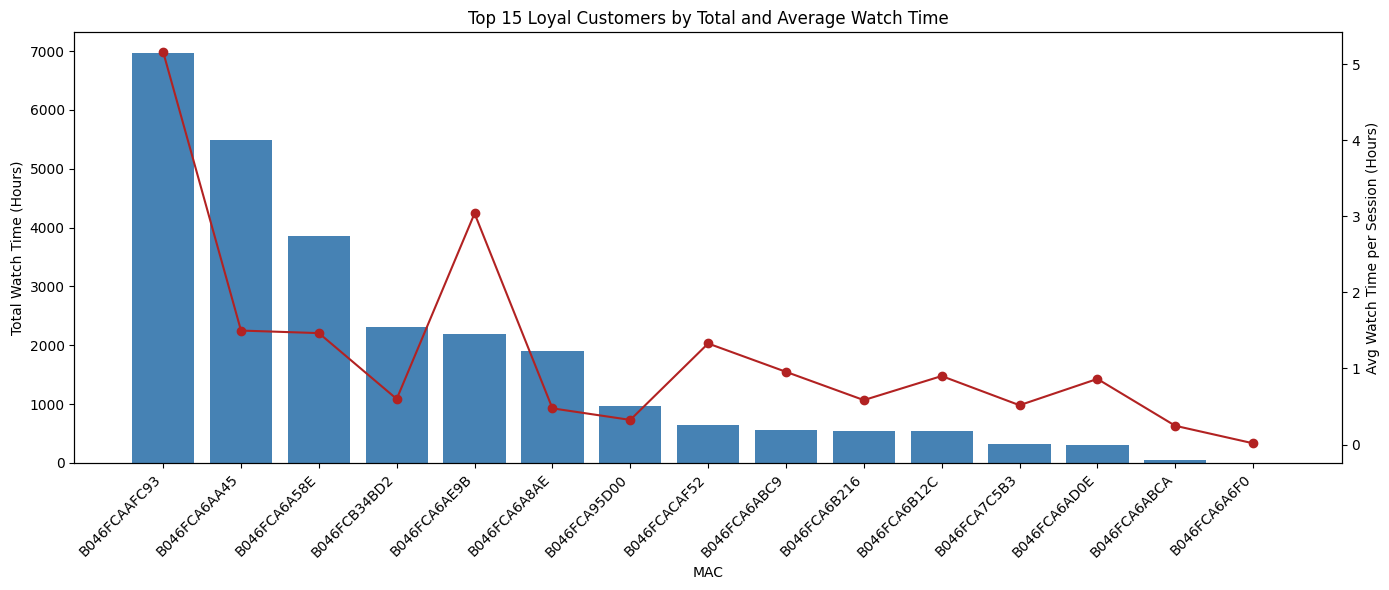

In [19]:
loyal_customers = usage_summary[usage_summary['NumOfAppPerMac']>1].sort_values(
                    by=['DaysRegistered', 'AverageViewingTime'], ascending = [False, False]).head(15)
loyal_customers = loyal_customers.sort_values( by='TotalPlayingTimeHour', ascending = False)

fig, axs = plt.subplots(figsize=(14,6))

axs.bar(loyal_customers['MAC'], loyal_customers['TotalPlayingTimeHour'], color='steelblue')
axs.set_ylabel('Total Watch Time (Hours)')
axs.set_xlabel('MAC')
plt.xticks(rotation=45, ha='right')

axs1 = axs.twinx()
axs1.plot(loyal_customers['MAC'], loyal_customers['AverageViewingTime'], marker='o', color='firebrick')
axs1.set_ylabel('Avg Watch Time per Session (Hours)')


plt.title('Top 15 Loyal Customers by Total and Average Watch Time')
plt.tight_layout()
plt.show()


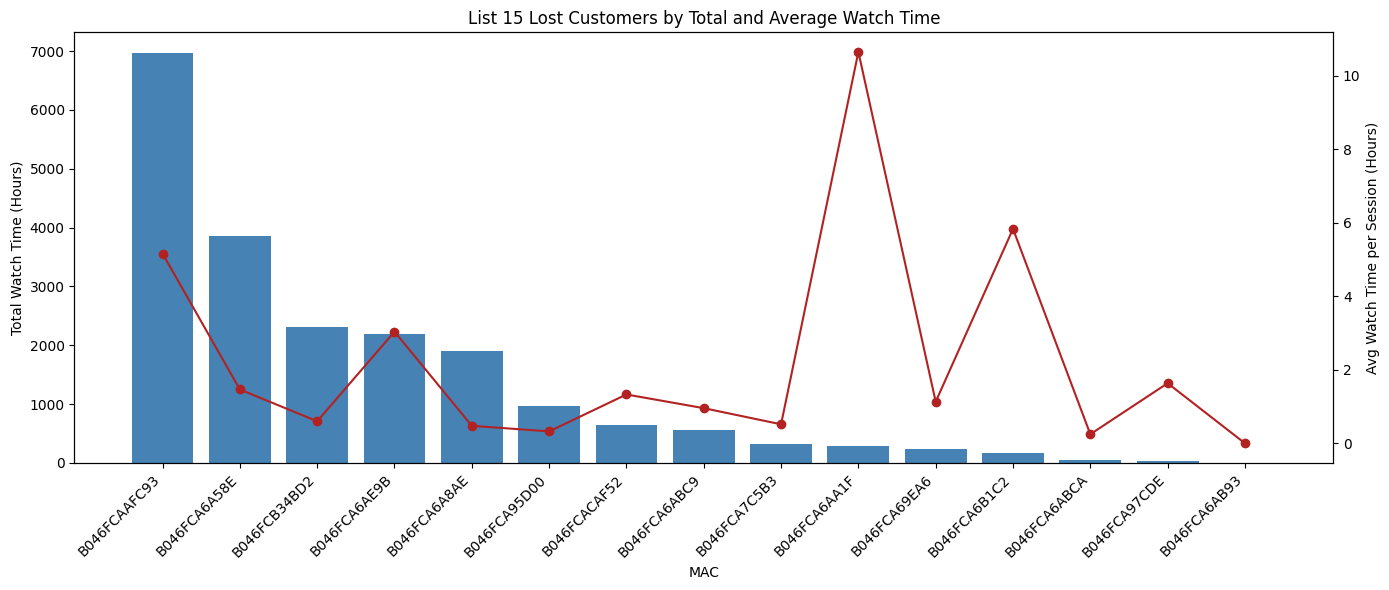

In [20]:
lost_customers = usage_summary[usage_summary['UserType']!= 'New user'].sort_values(
                    by=['DaysRegistered', 'AverageViewingTime'], ascending = [False, True]).head(15)
lost_customers = lost_customers.sort_values( by='TotalPlayingTimeHour', ascending = False)

fig, axs = plt.subplots(figsize=(14,6))

axs.bar(lost_customers['MAC'], lost_customers['TotalPlayingTimeHour'], color='steelblue')
axs.set_ylabel('Total Watch Time (Hours)')
axs.set_xlabel('MAC')
plt.xticks(rotation=45, ha='right')

axs1 = axs.twinx()
axs1.plot(lost_customers['MAC'], lost_customers['AverageViewingTime'], marker='o', color='firebrick')
axs1.set_ylabel('Avg Watch Time per Session (Hours)')


plt.title('List 15 Lost Customers by Total and Average Watch Time')
plt.tight_layout()
plt.show()


### **B. Phân tích theo ứng dụng (AppName)**
* Người dùng dùng IPTV khác gì so với VOD?
* Sự khác biệt về thời lượng xem giữa các loại app?
#### 💡 Insight gợi ý:
* User chỉ dùng 1 app (VD: chỉ IPTV) → nhóm user đơn kênh
* User dùng cả 2 app → nhóm đa kênh, có thể là khách hàng giá trị cao hơn

## **Predict**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [22]:
NumOfSession_low = usage_summary['NumOfSession'].quantile(0.25)
InactiveDays_high = usage_summary['InactiveDays'].quantile(0.75)

usage_summary['IsQuit'] = usage_summary.apply(lambda x: 1 if x['InactiveDays'] >= InactiveDays_high and x['NumOfSession'] <= NumOfSession_low else 0, axis=1)

### ***KNN method***

In [23]:
df = usage_summary.select_dtypes(include=['float','int']) #.columns
df['IsQuit'].value_counts()
# df['IsQuit'].unique()


IsQuit
0    1479
1     214
Name: count, dtype: int64

In [24]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['IsQuit'])
X_train = df_train.copy()
y_train = X_train.pop('IsQuit')

X_test = df_test.copy()
y_test = X_test.pop('IsQuit')

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1354, 11) (1354,)
(339, 11) (339,)


In [25]:
def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels= y_test.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Quit','Not Quit']) #y_test.unique())
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=15, pad=20)
    plt.xlabel('Prediction', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    # plt.grid(b=None)
    plt.show()
    
def disp_roc_curve(y_test,y_pred):
    fpr, tpr, _ = roc_curve(y_test,y_pred)
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

def evaluate_model(y_test,y_pred):
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values:\n',arr[:10])
    print(f'Accuracy Scores: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'Precision: {precision_score(y_test, y_pred) * 100:.2f}%')
    print(f'Recall: {recall_score(y_test, y_pred) * 100:.2f}%')
    print(f'F1 Score: {f1_score(y_test, y_pred) * 100:.2f}%')
    fpr, tpr, _ = roc_curve(y_test,y_pred)
    print(f'Area under curve (AUC): {auc(fpr, tpr) * 100:.2f}%')
    print('Classification Report from sklearn:\n',classification_report(y_test, y_pred))
    print(f'Confusion Matrix\n',confusion_matrix(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    disp_roc_curve(y_test,y_pred)

In [26]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

Printing predicted and actual values:
 [[0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]]
Accuracy Scores: 92.33%
Precision: 90.48%
Recall: 44.19%
F1 Score: 59.38%
Area under curve (AUC): 71.76%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       296
           1       0.90      0.44      0.59        43

    accuracy                           0.92       339
   macro avg       0.91      0.72      0.78       339
weighted avg       0.92      0.92      0.91       339

Confusion Matrix
 [[294   2]
 [ 24  19]]


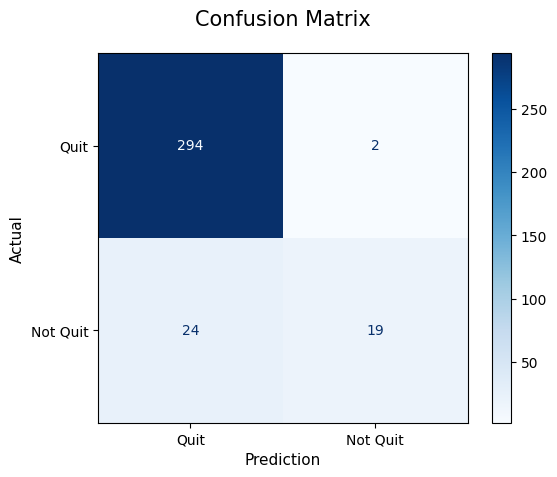

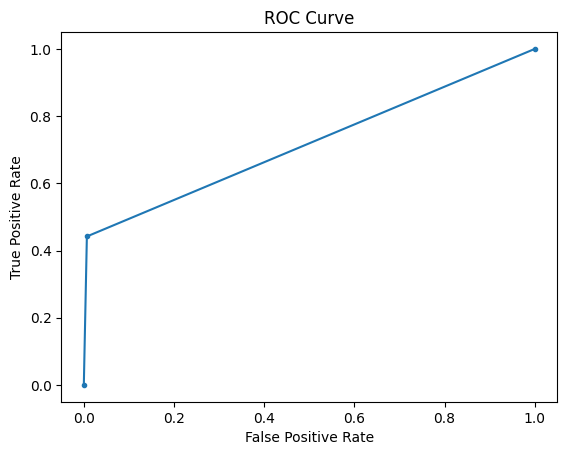

In [27]:
model = KNeighborsClassifier(n_neighbors = 1, p = 2)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Printing predicted and actual values:
 [[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]]
Accuracy Scores: 92.04%
Precision: 83.33%
Recall: 46.51%
F1 Score: 59.70%
Area under curve (AUC): 72.58%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       296
           1       0.83      0.47      0.60        43

    accuracy                           0.92       339
   macro avg       0.88      0.73      0.78       339
weighted avg       0.92      0.92      0.91       339

Confusion Matrix
 [[292   4]
 [ 23  20]]


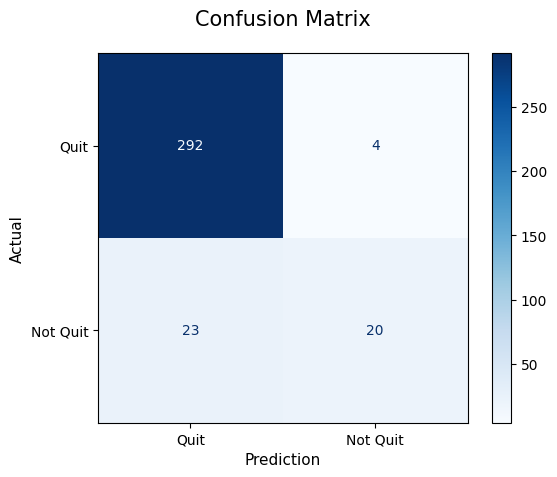

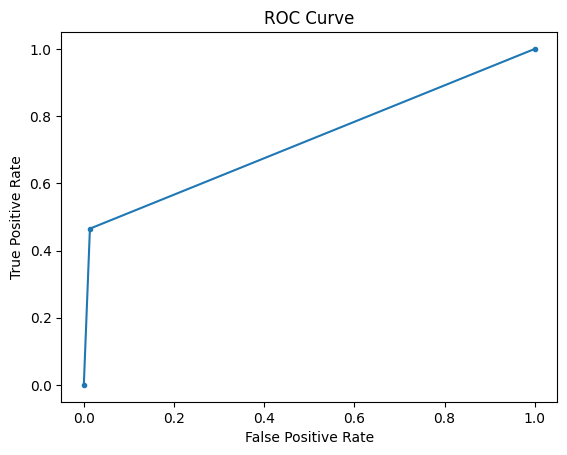

In [28]:
model = KNeighborsClassifier(n_neighbors = 5, p = 2)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

Printing predicted and actual values:
 [[0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]]
Accuracy Scores: 92.33%
Precision: 84.00%
Recall: 48.84%
F1 Score: 61.76%
Area under curve (AUC): 73.74%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       296
           1       0.84      0.49      0.62        43

    accuracy                           0.92       339
   macro avg       0.88      0.74      0.79       339
weighted avg       0.92      0.92      0.91       339

Confusion Matrix
 [[292   4]
 [ 22  21]]


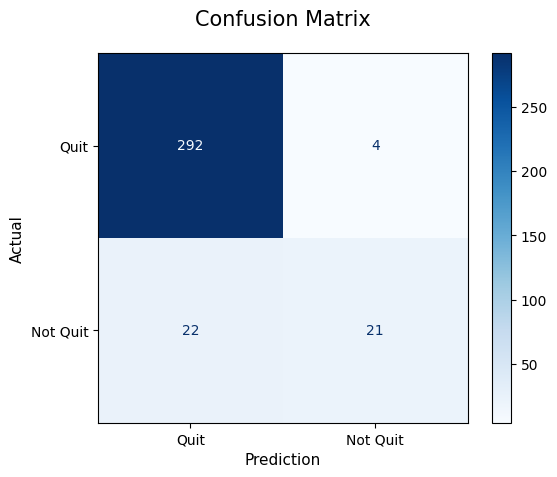

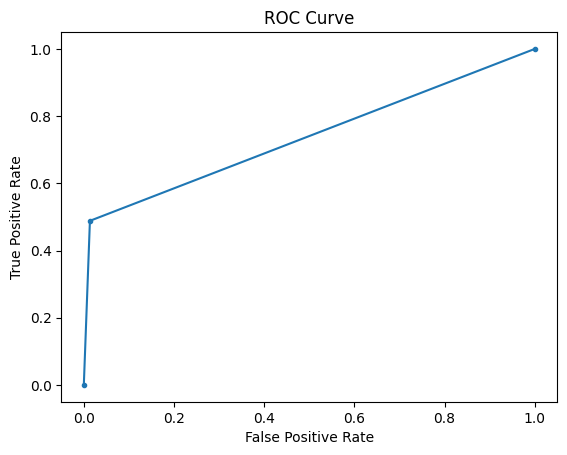

In [29]:
model = KNeighborsClassifier(n_neighbors = 5, p = 2, weights= 'distance')
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Printing predicted and actual values:
 [[0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]]
Accuracy Scores: 92.04%
Precision: 83.33%
Recall: 46.51%
F1 Score: 59.70%
Area under curve (AUC): 72.58%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       296
           1       0.83      0.47      0.60        43

    accuracy                           0.92       339
   macro avg       0.88      0.73      0.78       339
weighted avg       0.92      0.92      0.91       339

Confusion Matrix
 [[292   4]
 [ 23  20]]


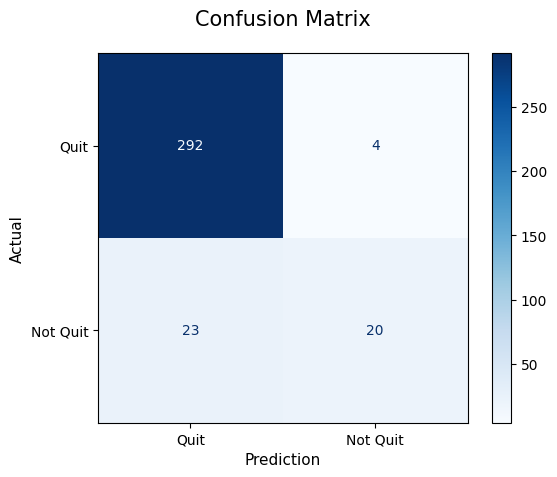

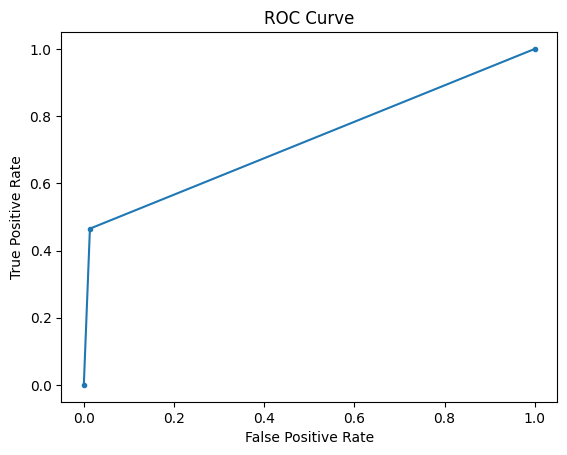

In [30]:
model = KNeighborsClassifier(n_neighbors = 5, p = 1, weights= 'distance')
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

### ***Logistics Regression Method***